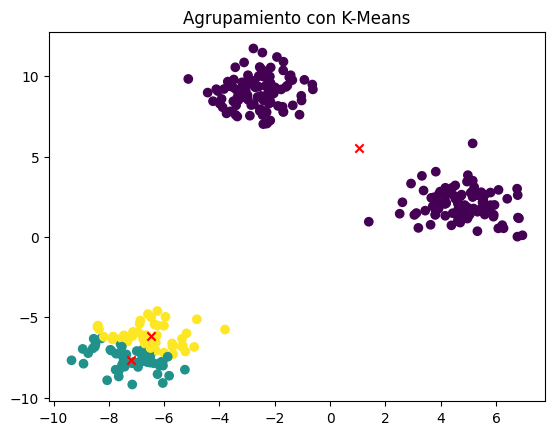

In [2]:
import random
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None

    def fit(self, data):
        n_samples, n_features = data.shape
        self.centroids = data[random.sample(range(n_samples), self.k)]

        for _ in range(self.max_iters):
            # Asignar cada punto al centroide más cercano
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Calcular nuevos centroides
            new_centroids = np.array([data[self.labels == i].mean(axis=0) if len(data[self.labels == i]) > 0 else self.centroids[i]
                                      for i in range(self.k)])

            # Ver si los centroides han cambiado
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Ejemplo de uso básico
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Crear datos de prueba
    X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

    # Aplicar KMeans
    modelo = KMeans(k=3)
    modelo.fit(X)
    etiquetas = modelo.predict(X)

    # Mostrar resultados
    plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis')
    plt.scatter(modelo.centroids[:, 0], modelo.centroids[:, 1], c='red', marker='x')
    plt.title("Agrupamiento con K-Means")
    plt.show()
